In [19]:
# Exploratory Data Analysis (EDA) for Financial News Dataset
#
# This script performs EDA on the raw_analyst_ratings.csv dataset
# as part of Task 1. The analysis includes descriptive statistics,
# publisher analysis, temporal distribution, and basic text analysis
# for topic modeling.

# financial-news-analysis/scripts/eda.py (or your notebook)

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from financial_news import NewsDataLoader, NewsAnalyzer, setup_logging
import os # <--- IMPORT OS MODULE



In [21]:
print("Attempting to download 'punkt_tab' explicitly...")
try:
    nltk.download('punkt_tab', quiet=False) # See all output
    print("'punkt_tab' download command executed.")
    # Verify if it can be found by the path NLTK is complaining about
    try:
        nltk.data.find('tokenizers/punkt_tab/english/') # From your error trace
        print("Successfully found: 'tokenizers/punkt_tab/english/'")
    except LookupError:
        print("Still NOT found: 'tokenizers/punkt_tab/english/'")
        try:
            nltk.data.find('tokenizers/punkt_tab')
            print("Found: 'tokenizers/punkt_tab' (generic)")
        except LookupError:
            print("NOT Found: 'tokenizers/punkt_tab' (generic)")

except Exception as e:
    print(f"Error during 'punkt_tab' download attempt: {e}")

Attempting to download 'punkt_tab' explicitly...


[nltk_data] Downloading package punkt_tab to C:\Users\Yoga
[nltk_data]     i7\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


'punkt_tab' download command executed.
Successfully found: 'tokenizers/punkt_tab/english/'


In [22]:
# --- Define the directory for saving plots ---
PLOTS_DIR = 'plots'
# --- Create the plots directory if it doesn't exist ---
os.makedirs(PLOTS_DIR, exist_ok=True)
# The exist_ok

In [23]:
news_loader = NewsDataLoader('../data/raw_analyst_ratings.csv')
news_df = news_loader.load()
print("First 5 rows of the dataset:")
print(news_df.head())

2025-06-01 20:14:02,115 - financial_news.data_loader - INFO - Attempting to load news data from: ../data/raw_analyst_ratings.csv


DEBUG: [NewsDataLoader.load] Attempting to load: ../data/raw_analyst_ratings.csv


2025-06-01 20:14:09,618 - financial_news.data_loader - INFO - CSV loaded. Columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']
2025-06-01 20:14:09,621 - financial_news.data_loader - INFO - Initial 'date' column dtype before any conversion: object
2025-06-01 20:14:09,622 - financial_news.data_loader - INFO - First 5 values of 'date' column (raw): ['2020-06-05 10:30:54-04:00', '2020-06-03 10:45:20-04:00', '2020-05-26 04:30:07-04:00', '2020-05-22 12:45:06-04:00', '2020-05-22 11:38:59-04:00']
2025-06-01 20:14:09,623 - financial_news.data_loader - INFO - Attempting explicit pd.to_datetime on 'date' column (current dtype: object)


DEBUG: [NewsDataLoader.load] CSV loaded. Columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']
DEBUG: [NewsDataLoader.load] Initial 'date' column dtype: object
DEBUG: [NewsDataLoader.load] First 5 'date' values (raw): ['2020-06-05 10:30:54-04:00', '2020-06-03 10:45:20-04:00', '2020-05-26 04:30:07-04:00', '2020-05-22 12:45:06-04:00', '2020-05-22 11:38:59-04:00']
DEBUG: [NewsDataLoader.load] Attempting explicit pd.to_datetime on 'date' column.


2025-06-01 20:14:10,283 - financial_news.data_loader - INFO - After explicit pd.to_datetime, 'date' column dtype: datetime64[ns, UTC-04:00]
2025-06-01 20:14:10,284 - financial_news.data_loader - INFO - First 5 values of 'date' column (after parse): [Timestamp('2020-06-05 10:30:54-0400', tz='UTC-04:00'), Timestamp('2020-06-03 10:45:20-0400', tz='UTC-04:00'), Timestamp('2020-05-26 04:30:07-0400', tz='UTC-04:00'), Timestamp('2020-05-22 12:45:06-0400', tz='UTC-04:00'), Timestamp('2020-05-22 11:38:59-0400', tz='UTC-04:00')]
2025-06-01 20:14:10,288 - financial_news.data_loader - INFO - Starting preprocessing of news data...
2025-06-01 20:14:10,289 - financial_news.data_loader - INFO - Inside _preprocess, 'date' column dtype IS: datetime64[ns, UTC-04:00]


DEBUG: [NewsDataLoader.load] After explicit pd.to_datetime, 'date' column dtype: datetime64[ns, UTC-04:00]
DEBUG: [NewsDataLoader.load] First 5 'date' values (after parse): [Timestamp('2020-06-05 10:30:54-0400', tz='UTC-04:00'), Timestamp('2020-06-03 10:45:20-0400', tz='UTC-04:00'), Timestamp('2020-05-26 04:30:07-0400', tz='UTC-04:00'), Timestamp('2020-05-22 12:45:06-0400', tz='UTC-04:00'), Timestamp('2020-05-22 11:38:59-0400', tz='UTC-04:00')]
DEBUG: [NewsDataLoader._preprocess] Starting.
DEBUG: [NewsDataLoader._preprocess] 'date' column dtype: datetime64[ns, UTC-04:00]


2025-06-01 20:14:10,952 - financial_news.data_loader - INFO - Attempting to extract temporal features (date_day, date_hour, date_weekday)...
2025-06-01 20:14:11,155 - financial_news.data_loader - INFO - Temporal features extracted successfully.
2025-06-01 20:14:11,156 - financial_news.data_loader - INFO - Preprocessing of news data finished.
2025-06-01 20:14:11,157 - financial_news.data_loader - INFO - Successfully loaded and preprocessed 1407328 news records from ../data/raw_analyst_ratings.csv


DEBUG: [NewsDataLoader._preprocess] Attempting .dt access. df['date'].dtype is datetime64[ns, UTC-04:00]
DEBUG: [NewsDataLoader._preprocess] df['date'].head() before .dt:
0   2020-06-05 10:30:54-04:00
1   2020-06-03 10:45:20-04:00
2   2020-05-26 04:30:07-04:00
3   2020-05-22 12:45:06-04:00
4   2020-05-22 11:38:59-04:00
Name: date, dtype: datetime64[ns, UTC-04:00]
DEBUG: [NewsDataLoader._preprocess] Temporal features extracted.
DEBUG: [NewsDataLoader._preprocess] Finished.
DEBUG: [NewsDataLoader.load] Load and preprocess successful.
First 5 rows of the dataset:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                        

In [24]:
analyzer = NewsAnalyzer(news_df)
stats = analyzer.get_basic_stats()
print("\nBasic Statistics:")
print(stats)


Basic Statistics:
total_articles                                                   1407328
unique_stocks                                                       6204
unique_publishers                                                   1034
date_range             (2011-04-27 21:01:48-04:00, 2020-06-11 17:12:3...
headline_length_avg                                            73.120508
headline_length_std                                            40.735311
dtype: object



Top 10 Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


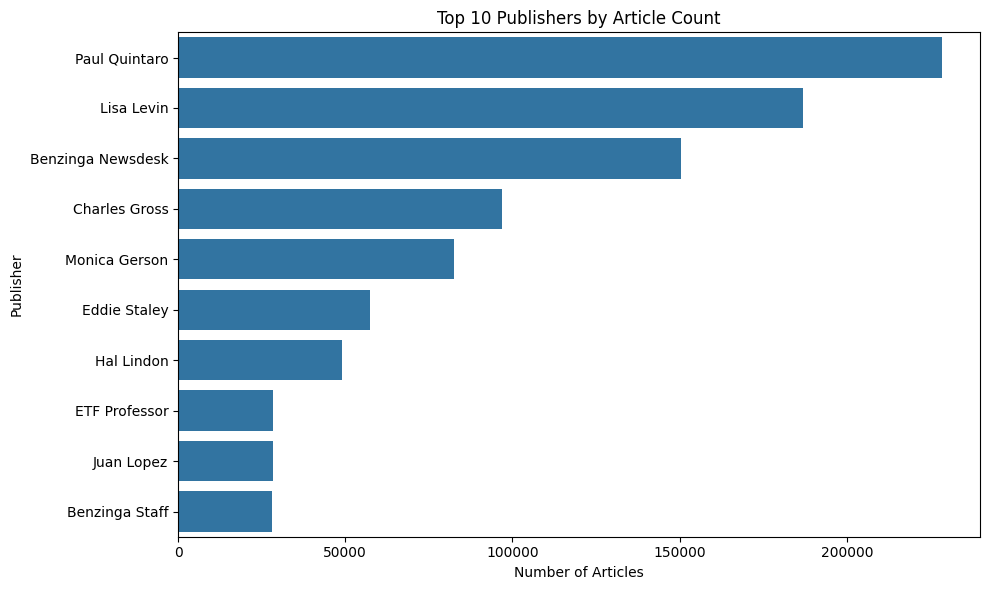

In [25]:
top_publishers = analyzer.analyze_publishers(top_n=10)
print("\nTop 10 Publishers:")
print(top_publishers)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.tight_layout()
# Use os.path.join for constructing paths robustly
plt.savefig(os.path.join(PLOTS_DIR, 'publisher_distribution.png')) # <--- MODIFIED
plt.show()

In [26]:
def extract_domain(publisher):
    if isinstance(publisher, str): # Add check for string type
        if '@' in publisher:
            return publisher.split('@')[1]
    return publisher # Return original if not string or no '@'

In [27]:
news_df['publisher_domain'] = news_df['publisher'].apply(extract_domain)
domain_counts = news_df['publisher_domain'].value_counts().head(10)
print("\nTop 10 Publisher Domains:")
print(domain_counts)


Top 10 Publisher Domains:
publisher_domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


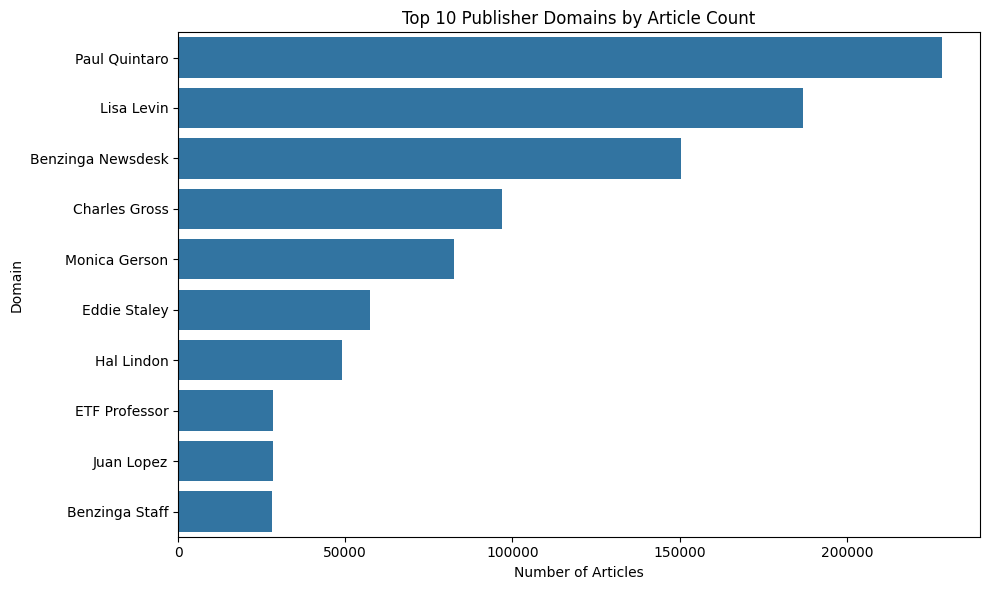

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=domain_counts.values, y=domain_counts.index)
plt.title('Top 10 Publisher Domains by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Domain')
plt.tight_layout()
plt.savefig(os.path.join(PLOTS_DIR, 'domain_distribution.png')) # <--- MODIFIED
plt.show()


In [29]:

# The plot_temporal_distribution method in NewsAnalyzer also uses save_path
# Ensure the PLOTS_DIR is created before this is called.
daily, hourly = analyzer.plot_temporal_distribution(save_path=os.path.join(PLOTS_DIR, 'temporal_distribution.png')) # <--- MODIFIED
print("\nDaily Publication Summary:")
print(daily.describe())
print("\nHourly Publication Summary:")
print(hourly.describe())

stop_words = set(stopwords.words('english'))

2025-06-01 20:14:31,567 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-01 20:14:31,574 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



Daily Publication Summary:
count    3334.000000
mean       16.792741
std        60.088398
min         0.000000
25%         1.000000
50%         5.000000
75%        14.000000
max       973.000000
dtype: float64

Hourly Publication Summary:
count      24.000000
mean     2332.791667
std      2421.401283
min        14.000000
25%        90.250000
50%      1720.500000
75%      4212.500000
max      7669.000000
Name: count, dtype: float64


In [30]:
def clean_text(text):
    if not isinstance(text, str): # Add check for string type
        return []
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return tokens


Top 20 Most Common Words in Headlines:
[('stocks', 161702), ('vs', 138835), ('eps', 128801), ('est', 122289), ('shares', 114140), ('reports', 108688), ('update', 91645), ('market', 91080), ('earnings', 87183), ('sales', 79528), ('top', 78493), ('benzinga', 74466), ('pt', 73059), ('announces', 66531), ('price', 64217), ('buy', 63928), ('downgrades', 61942), ('trading', 61146), ('raises', 57793), ('upgrades', 56802)]


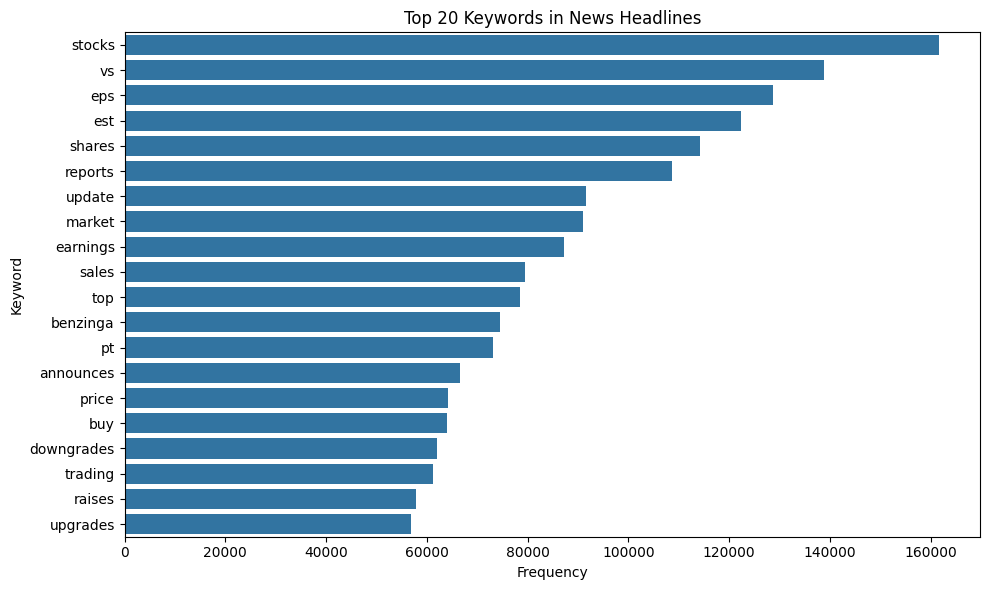

In [31]:
news_df['tokens'] = news_df['headline'].apply(clean_text)
all_tokens = [token for tokens_list in news_df['tokens'] for token in tokens_list if isinstance(tokens_list, list)] # Ensure tokens_list is a list
word_freq = Counter(all_tokens)
common_words = word_freq.most_common(20)
print("\nTop 20 Most Common Words in Headlines:")
print(common_words)

if common_words: # Check if common_words is not empty
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words)
    plt.title('Top 20 Keywords in News Headlines')
    plt.xlabel('Frequency')
    plt.ylabel('Keyword')
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS_DIR, 'keyword_frequency.png')) # <--- MODIFIED
    plt.show()
else:
    print("No common words found to plot.")